# Integrales definidas:   Este programa muestra como es el uso del cálculo del error en el metodo del trapecio 

#Metodo del trapecio

> $$
  \int_{a}^{b} f(x)\,dx 
  = \sum_{i=0}^{N-1}  \int_{i}^{x_{i+1}} f(x)\,dx
  =  \frac{h}{2} \sum_{i=0}^{N-1}(f(x_i)+f(x_{i+1})) 
    - \frac{(b-a) h^2}{12}f''(\xi),
  $$

donde $\xi\in [b,a]$, $h=a-b$

\epsilon=0.001



## Cálculo del error para que sea menor $\epsilon$. 

Sea 

>$$
 \int_0^1 \log(1+x^2)\, dx
 $$

 \epsilon=0.001


In [ ]:
a, b = 0,  1.

def f(x): 
  return np.log(1 + x ** 2)

epsilon = 0.001

Para encontrar el error, se debe de encontrar el maximo de $f''(\xi)$, para ello empleemos la libreria sympy, para mostrar que la derivada de la función es:


  * $\displaystyle f'(x)=\frac{2x}{1+x^2}$
  * $\displaystyle f''(x)=\frac{2(1+x^2) - 2x\cdot2x}{(1+x^2)^2}
      = \frac{2 - 2x^2}{(1+x^2)^2}$
  


In [ ]:
#=================================================
import sympy as sp 
import numpy as np
import matplotlib.pylab as plt
from sympy import init_printing
from scipy import  optimize
init_printing() 
#=================================================


In [ ]:
f_s = lambda x: sp.log(1 + x**2)#Definicion de la función 
x = sp.symbols("x") #DEfinicion de x como simbolo.
print(f_s(x))
print(sp.diff(f_s(x), x, 1))
print(sp.diff(f_s(x), x, 2))
print(sp.diff(f_s(x), x, 3))


log(x**2 + 1)
2*x/(x**2 + 1)
2*(-2*x**2/(x**2 + 1) + 1)/(x**2 + 1)
4*x*(4*x**2/(x**2 + 1) - 3)/(x**2 + 1)**2


[-0.         -0.0433832  -0.09216949 -0.14675178 -0.20749549 -0.2747196
 -0.34867367 -0.42951059 -0.51725552 -0.61177148 -0.71272293 -0.81953924
 -0.93138078 -1.04711109 -1.16527943 -1.28411812 -1.4015594  -1.51527551
 -1.62274433 -1.7213407  -1.80845033 -1.8816     -1.9385946  -1.97764915
 -1.99750277 -1.99750277 -1.97764915 -1.9385946  -1.8816     -1.80845033
 -1.7213407  -1.62274433 -1.51527551 -1.4015594  -1.28411812 -1.16527943
 -1.04711109 -0.93138078 -0.81953924 -0.71272293 -0.61177148 -0.51725552
 -0.42951059 -0.34867367 -0.2747196  -0.20749549 -0.14675178 -0.09216949
 -0.0433832  -0.        ]


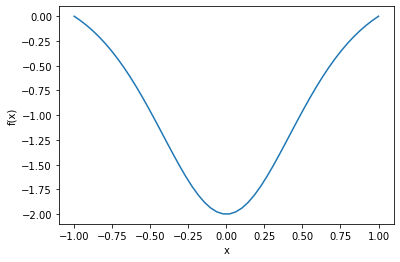

In [ ]:
#Numpy funcion para evaluar la funcion de sympy
f2 = sp.diff(f_s(x), x, 2)

fxn5 = sp.lambdify(x, -f2, 'numpy') #numpy funcion

x_ = np.linspace(-1, 1)
print(fxn5(x_))

plt.figure()
plt.plot(x_, fxn5(x_))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [ ]:
fp=optimize.fmin_powell( fxn5, 0.1,  ftol=1E-7 )


Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 2
         Function evaluations: 32


In [ ]:
fp

array(2.71379983e-09)

In [ ]:
Max = np.max(-fxn5(x_))
print(Max)
#Maximo de la función

1.99750277488715


$$
  |E_N(f)| \le  \frac{(b-a) h^2}{12} f''(\xi), = 1 *2\frac{h^2}{12}= \frac{h^2}{6}<\epsilon
  $$
  
  > $\epsilon=0.001$
  
  $$
  \frac{h^2}{6}<\epsilon
  $$
  
  $$
  h = \sqrt{6\epsilon}= \sqrt{0.006}
  $$
  
  

In [ ]:
h = np.sqrt(0.006)
print("El tamaño de cada paso es %.5lf:"  %h)

print("El numero de intervalos es: %.5lf" %((b-a)/h) )

El tamaño de cada paso es 0.07746:
El numero de intervalos es: 12.90994


Lo anterior implica, que el número minimo de intervalos para realizar la integral con un error de 0.001, es de N=13. Empleando la ecuacion para resolver la integral por el metodo del trapecio compuesto, tenemos que: 

\begin{equation}
\int_{a}^{b}f(x)dx=  \frac{h}{2}\left[f(a)+2\sum_{j=1}^{n-1}f(x_j)+f(b)\right ]
\end{equation}



In [ ]:
N = 13
a, b = 0, 1 
h = float((b - a)/N)

x = np.linspace(a, b, N+1) #Definición de los puntos extremos
x_interior = x[1:-1]  #Puntos del interior

T1 =  (f(a))
T3 =  (f(b))
T2 =  sum(f(x_interior))

trap_f = T1 + 2*T2 + T3
trap_f = 0.5*h*trap_f

print("El valor de la integral es: %.8lf " %trap_f)


El valor de la integral es: 0.26443665 


In [ ]:
from scipy import integrate
t = integrate.trapz( f(x), x, h )
print("El valor, empleando la libreria integrate es: %.8lf" %t)

El valor, empleando la libreria integrate es: 0.26443665


In [ ]:
#Comparando con el valor exacto, tenemos que: 
from scipy.integrate import quad
quad_python = quad(f, a, b)
print ("Cuadratura de python:", quad_python)
Iq = quad_python [0]
print ("Diferencia:", ( (trap_f - Iq)/Iq))

Cuadratura de python: (0.26394350735484196, 2.930361590656649e-15)
Diferencia: 0.0018683741818406388


#Metodo del Sympson


 En general, la regla de simpson es
 
$$
 \int_a^b f(x)dx = \frac{h}{3}\left[f(a) + 2\sum_{i=1}^{(n-1)}f(x_{2i}) + 4\sum_{i=1}^{n}f(x_{2i-1}) + f(b)\right]-\frac{b − a}{180}h^4f^{(4)}(\xi)
,$$
 
 donde $\xi ∈ (a,b).$
error=0.001


In [ ]:
a, b = 0,  1.
def f(x): 
  return np.log(1 + x ** 2)
epsilon = 0.001

#epsilon = 1e-5

In [ ]:
def simpson(f, a, b, N):
    """
    Aproxima la integral de $f$ en $[a,b]$ mediante la fórmula compuesta 
    de Simpson con N subintervalos
    """
    n_nodos = 2*N+1 # (N+1 extremos de subintervalos) + (N puntos medios)
    x = np.linspace(a, b, n_nodos)

    x_impar = x[1: :2] # Nodos con coordenada impar (ptos medios)
    x_par = x[2:n_nodos-1:2] # Nodos con coordenada par (salvo el primero y el último)

    h = (b-a)/(2*N) # Distancia entre dos nodos de integración
    cuad = h/3*(f(a) + 2*sum(f(x_par)) + 4*sum(f(x_impar)) + f(b)) # F. comp. de Simpson
    return cuad  
  
#- La expresión `x`, o `x[:]`, representa todos los elementos de la lista x
#- La expresión `x[M:N]`, o `x[M:]`, representa los elementos `x[M]`, `x[M+1]`,..., `x[N-1]`
#- La expresión `x[M:N:k]`, o `x[M::k]`, representa los elementos `x[M]`, `x[M+k]`,..., `x[N-1]`
#x = np.linspace(0, 1, 10)
#x_impar = x[1:: 2]  
#x_par = x[2: -1: 2]
#print(x)
#print(x_impar)
#print(x_par)

  
  

In [ ]:
x = simpson(f, 0, 1, 20)
print(x)

0.26394350518567283


## Para deducir el numero de intervalos tenemos que : 
$$
\frac{b − a}{180}h^4f^{(4)}(\xi) = \epsilon
$$

$$
\frac{b − a}{180}h^4 \mathrm{Max} ||f^{(4)}(\xi)||=\epsilon
$$

con $$h = (b-a)/(2N)$$

$$
\frac{(b − a)^5}{180(2N)^4} \mathrm{Max} ||f^{(4)}(\xi)||=\epsilon
$$

$$
N^4 = \frac{(b − a)^5}{180(2)^4\epsilon} \mathrm{Max} ||f^{(4)}(\xi)||
$$

In [ ]:
f_s = lambda x: sp.log(1 + x**2)

x = sp.symbols("x")

print(f_s(x))
print(sp.diff(f_s(x), x, 1))
print(sp.diff(f_s(x), x, 2))
print(sp.diff(f_s(x), x, 3))
print(sp.diff(f_s(x), x, 4))


log(x**2 + 1)
2*x/(x**2 + 1)
2*(-2*x**2/(x**2 + 1) + 1)/(x**2 + 1)
4*x*(4*x**2/(x**2 + 1) - 3)/(x**2 + 1)**2
12*(-8*x**4/(x**2 + 1)**2 + 8*x**2/(x**2 + 1) - 1)/(x**2 + 1)**2


[-12.         -11.95009361 -11.80124435 -11.55603605 -11.21868988
 -10.79494054 -10.29187077  -9.71771136  -9.0816152   -8.39341451
  -7.66337093  -6.90192756  -6.1194715   -5.32611444  -4.53149713
  -3.74462252  -2.97372025  -2.22614402  -1.50830157  -0.82561607
  -0.18251637   0.41754692   0.97206344   1.47940701   1.93876566
   2.35006168   2.71386543   3.03130622   3.30398314   3.53387829
   3.72327433   3.8746778    3.99074921   4.07424061   4.12794086
   4.15462866   4.15703306   4.1378012    4.09947262   4.0444596
   3.97503298   3.89331257   3.80126184   3.70068589   3.59323238
   3.48039484   3.36351768   3.24380275   3.12231685   3.        ]


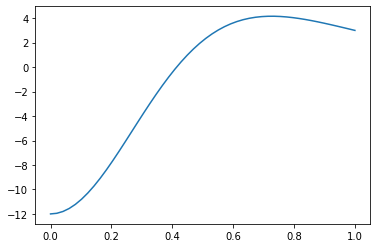

In [ ]:
#Numpy funcion para evaluar la funcion de sympy
f2 = sp.diff(f_s(x), x, 4)

fxn5 = sp.lambdify(x, f2, 'numpy') #numpy funcion

x_ = np.linspace(0, 1)
print(fxn5(x_))

plt.figure()
plt.plot(x_, fxn5(x_))
plt.show()

In [ ]:
epsilon=1e-5

def N(a, b, M):
  return ((b-a)**5*M/(epsilon*180*2**4))**(1./4)

N(0,1,12)

In [ ]:
simp = simpson(f, a, b, 4)
print(simp)

0.2639421665115566


In [ ]:
#Comparando con el valor exacto, tenemos que: 
from scipy.integrate import quad
quad_python = quad(f, a, b)


In [ ]:
print ("Cuadratura de python:", quad_python)
Iq = quad_python [0]

print ("Diferencia:", ( (simp - Iq)/Iq))

Cuadratura de python: (0.26394350735484196, 2.930361590656649e-15)
Diferencia: -5.080038902204066e-06


Emplear el metodo de trapezio y el metodo de simpson para calcular la siguiente integral: 

\begin{equation}
\int_0^{2} e^{2x}\sin 3x dx 
\end{equation}
$\epsilon=1\times 10^{-5}$

In [ ]:
f_s = lambda x: sp.exp(2*x)*sp.sin(3*x)

#DEfinicion de la función 

x = sp.symbols("x") #DEfinicion de x como simbolo.

print(f_s(x))
print(sp.diff(f_s(x), x, 1))
print(sp.diff(f_s(x), x, 2))
print(sp.diff(f_s(x), x, 3))


exp(2*x)*sin(3*x)
2*exp(2*x)*sin(3*x) + 3*exp(2*x)*cos(3*x)
(-5*sin(3*x) + 12*cos(3*x))*exp(2*x)
(-46*sin(3*x) + 9*cos(3*x))*exp(2*x)


In [ ]:
sp.simplify(x**2+2*x+4+2*x)

[ 12.          12.26053133  12.27934771  12.01313936  11.41760893
  10.44833659   9.06180148   7.21656312   4.87460358   2.00282718
  -1.42528925  -5.42790798 -10.012921   -15.1759433  -20.89823855
 -27.14461383 -33.86132761 -40.97406215 -48.38601958 -55.97620825
 -63.59799326 -71.07799216 -78.21540293 -84.78185668 -90.52189158
 -95.15414707 -98.37337811 -99.85338747 -99.25097015 -96.2109567
 -90.37243196 -81.3761916  -68.87348091 -52.53603801 -32.06743692
  -7.21569481  22.21292867  56.33905245  95.19437345 138.70515199
 186.67524442 238.76900099 294.49440682 353.18690495 413.99440222
 475.86402008 537.53121072 597.51191375 654.0984767  705.36010288]


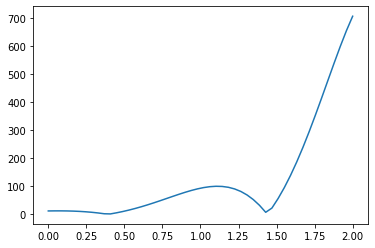

In [ ]:
#Numpy funcion para evaluar la funcion de sympy
f2 = sp.diff(f_s(x), x, 2)

fxn5 = sp.lambdify(x, f2, 'numpy') #numpy funcion

x_ = np.linspace(0, 2)
print(fxn5(x_))

plt.figure()
plt.plot(x_, abs(fxn5(x_)))
plt.show()

$$
  |E_N(f)| \le  \frac{(b-a) h^2}{12} f''(\xi), = 2*705\frac{h^2}{12}= 117.5h^2<\epsilon
  $$
  
  > $\epsilon=0.001$
  
  
  $$
  h = \sqrt{\epsilon/117.5}= \sqrt{0.006/117.5}
  $$
  
  

In [ ]:
epsilon=0.001
b=2
a=0
f2 = max(fxn5(x_))
h = np.sqrt(12*epsilon/(f2*(b-a)) ) #Funcion para determinar el tamaño del intervalo.
print(h)

0.0029165550598972043


In [ ]:
N = (b-a)/h
N = int(round(N))
print(N)

686


In [ ]:
a, b = 0,  2.

def f(x): 
  return np.exp(2*x)*np.sin(3*x)

x = np.linspace(0, 2, N+1)
t = integrate.trapz( f(x), x, h )

In [ ]:
print("El valor de la integral es : %.3lf" %t)

El valor de la integral es : -14.214


In [ ]:


x_interior = x[1:-1]  #Puntos del interior

T1 =  (f(a))
T3 =  (f(b))
T2 =  sum(f(x_interior))

trap_f = T1 + 2*T2 + T3
trap_f = 0.5*h*trap_f

print("El valor de la integral es: %.8lf " %trap_f)


El valor de la integral es: -14.21926780 


In [ ]:
f_s = lambda x: sp.exp(2*x)*sp.sin(3*x)
x = sp.symbols("x") #DEfinicion de x como simbolo.
fxn5 = sp.lambdify(x, f_s, 'numpy') #numpy funcion


SyntaxError: ignored

In [ ]:

#np.sum(fxn5(x[1:6]))